In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Przygotowanie danych i EDA

In [3]:
np.random.seed(45)

cereal_df = pd.read_csv('Płatki-sniadaniowe-cereals.txt', sep="\t")
cereal_df

,nazwa,producent,kalorie,cukry,weglowodany,proteiny,tluszcz,sod,blonnik,potas,Liczba_polek,srodk_polka,polka_1,polka_2,polka_3
0,100%_Bran,N,70,6,5.0,4,1,130,10.0,280,3,N,0,0,1
1,100%_Natural_Bran,Q,120,8,8.0,3,5,15,2.0,135,3,N,0,0,1
2,All-Bran,K,70,5,7.0,4,1,260,9.0,320,3,N,0,0,1
3,All-Bran_with_Extra_Fiber,K,50,0,8.0,4,0,140,14.0,330,3,N,0,0,1
4,Almond_Delight,R,110,8,14.0,2,2,200,1.0,1,3,N,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,110,3,21.0,2,1,250,0.0,60,3,N,0,0,1
73,Trix,G,110,12,13.0,1,1,140,0.0,25,2,T,0,1,0
74,Wheat_Chex,R,100,3,17.0,3,1,230,3.0,115,1,N,1,0,0
75,Wheaties,G,100,3,17.0,3,1,200,3.0,110,1,N,1,0,0


In [4]:
cereal_df.isna().sum()

,0
nazwa,0
producent,0
kalorie,0
cukry,0
weglowodany,0
proteiny,0
tluszcz,0
sod,0
blonnik,0
potas,0


In [5]:
cereal_df.duplicated().sum()

np.int64(0)

In [6]:
cereal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nazwa         77 non-null     object 
 1   producent     77 non-null     object 
 2   kalorie       77 non-null     int64  
 3   cukry         77 non-null     int64  
 4   weglowodany   77 non-null     float64
 5   proteiny      77 non-null     int64  
 6   tluszcz       77 non-null     int64  
 7   sod           77 non-null     int64  
 8   blonnik       77 non-null     float64
 9   potas         77 non-null     int64  
 10  Liczba_polek  77 non-null     int64  
 11  srodk_polka   77 non-null     object 
 12  polka_1       77 non-null     int64  
 13  polka_2       77 non-null     int64  
 14  polka_3       77 non-null     int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 9.2+ KB


In [7]:
cereal_df.describe()

,kalorie,cukry,weglowodany,proteiny,tluszcz,sod,blonnik,potas,Liczba_polek,polka_1,polka_2,polka_3
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,6.935065,14.844156,2.545455,1.012987,159.675325,2.151948,96.129870,2.207792,0.259740,0.272727,0.467532
std,19.484119,4.422840,3.898599,1.094790,1.006473,83.832295,2.383364,71.215823,0.832524,0.441367,0.448282,0.502217
min,50.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,100.000000,3.000000,12.000000,2.000000,0.000000,130.000000,1.000000,40.000000,1.000000,0.000000,0.000000,0.000000
50%,110.000000,7.000000,15.000000,3.000000,1.000000,180.000000,2.000000,90.000000,2.000000,0.000000,0.000000,0.000000
75%,110.000000,11.000000,17.000000,3.000000,2.000000,210.000000,3.000000,120.000000,3.000000,1.000000,1.000000,1.000000
max,160.000000,15.000000,23.000000,6.000000,5.000000,320.000000,14.000000,330.000000,3.000000,1.000000,1.000000,1.000000


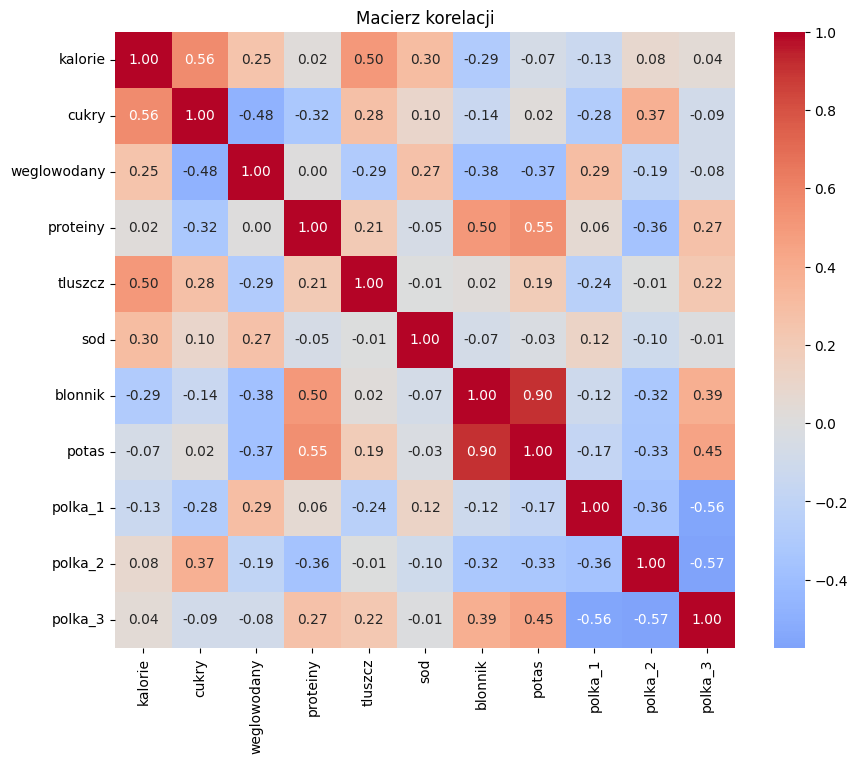

In [8]:
cereal_df = cereal_df.drop(['nazwa', 'producent', 'srodk_polka', 'Liczba_polek'], axis=1) # niepotrzebne z punktu widzenia modelu
plt.figure(figsize=(10,8))
sns.heatmap(cereal_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Macierz korelacji')
plt.show()

**Obserwacje:** Z analizy macierzy korelacji wynika, że półka 2 ma największą korelację ujemną z potasem, błonnikiem i białkiem, natomiat wysoką korelację dodatnią z cukrem, co może sugerować, że na półce 2 są płatki o najgorszym składzie, niezdrowe, których sklep chce się szybko pozbyć.

Półka 3 ma największą korelację dodatnią z potasem, błonnikiem i białkiem natomiast wysoką korelację ujemną z cukrem, co może sugerować, że na półce 3 będą płatki o najlepszym składzie, tj. największej zawartości błonnika, potasu czy białka.

Półka 1 nie ma jednoznacznej korelacji ze składem, ma największą korelację ujemną z cukrem czy tłuszczem ale tak samo ma korelację ujemną z błonnikiem czy potasem a z białkiem korelacja jest  dodatnia (największa dodatnia jest z węglowodanami). Można przypuszczać, że na tej półce będą płatki z wysoką zawartością węglowodanów, ale niską zawartością cukrów, gdyż te dwie zmienne mają skrajne, największe przeciwne korelacje z półką 1.

Widoczna jest także dość wysoka korelacja między zmiennymi: potas-błonnik-białko oraz cukier-kalorie.

Mając na uwagę wartość biznesową, ludzie przeważnie patrzą w składzie na cukier, kalotie, białko, błonnik i potas.

# Modelowanie
**a)** przeanalizować dane i zastanowić się nad tym „Co chcemy zbadać i dlaczego?”,
tzn. na jakie pytania chcemy sobie odpowiedzieć:


1.   Czy skład płatków ma wpływ na ich umiejscowienie na półce w sklepie (1, 2 czy 3 półka)?
2.   Czy płatki lepsze, zdrowsze, tj. np. z wyższą zawartością białka, potasu czy błonnika są umiejscowione wyżej ??
3.   Czy na półce środkowej są płatki gorsze jakościowo, których sklep chce się jak najszybciej pozbyć?
4. Jakie płatki umieszczane są na najniższej półce?




# Model dla półki 2
Półka znajduje się, zazwyczaj, na wysokości wzroku dzieci i w zasięgu ręki dorosłego szukającego szybkiego wyboru (niekoniecznie najzdrowszego). Sugerując się macierzą korelacji, na tej półce są najprawdopodobniej płatki gorszej jakości, które sklep chce nam opchnąć szybko.

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

In [30]:
features = cereal_df.columns.tolist()
features.remove('polka_1')
features.remove('polka_2')
features.remove('polka_3') # mozna szybciej, ale no ...
# print(features)

X_all_features = cereal_df[features]

def build_cereal_shelf_model(shelf_name, selected_features, roc=False): # trzeba sobie ułatwiać życie ;)
  X = X_all_features[selected_features]
  X = sm.add_constant(X)
  y = cereal_df[shelf_name]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

  model = sm.Logit(y_train, X_train).fit()

  y_pred_probability = model.predict(X_test)
  y_pred_binary = (y_pred_probability > 0.5).astype(int)

  conf_m = confusion_matrix(y_test, y_pred_binary)
  tn, fp, fn, tp = conf_m.ravel()
  specifity = tn / (tn + fp)


  print(f"{'='*20} Model dla półki: {shelf_name} i zmiennych {selected_features} {'='*20}")
  print(model.summary())

  print(conf_m.tolist())
  print(f"Dokładność: {accuracy_score(y_test, y_pred_binary)}")
  print(f"Precyzja: {precision_score(y_test, y_pred_binary)}")
  print(f"Czułość: {recall_score(y_test, y_pred_binary)}")
  print(f"Specyficzność: {specifity}")
  print(f"F1: {f1_score(y_test, y_pred_binary)}")
  print(f"AUC: {roc_auc_score(y_test, y_pred_probability)}")

  if roc:
    # krzywa ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability)  # False Positive Rate, True Positive Rate dla wszystkich progów
    roc_auc = auc(fpr, tpr)  # pole pod krzywą

    optimal_idx = np.argmax(tpr - fpr)  # max odleglosc, bo chce max true positive i najmniejsze false positive
    optimal_threshold = thresholds[optimal_idx]
    optimal_fpr = fpr[optimal_idx]
    optimal_tpr = tpr[optimal_idx]

    print(f"Najlepszy próg: {optimal_threshold:.3f}")


    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Krzywa ROC (AUC = {roc_auc:.3f})')
    plt.scatter(optimal_fpr, optimal_tpr, color='red', label=f"Punkt optymalny ({round(optimal_fpr, 3)}, {round(optimal_tpr, 3)})")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Klasyfikator losowy')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.02])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Krzywa ROC - Model logitowy')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()

  return model





**cukry** - chcemy sprawdzić czy wysoka zawartość cukru, jako niezdrowy składnik, jest jedynym czynnikiem, który sprawia, że dane płatki trafiają na tą półkę, co potwierdzałoby przyciąganie np. dzieci.

In [11]:
model_1 = build_cereal_shelf_model("polka_2", ["cukry"])


Optimization terminated successfully.
         Current function value: 0.488905
         Iterations 6
==================== Model dla półki: polka_2 i zmiennych ['cukry'] ====================
                           Logit Regression Results                           
Dep. Variable:                polka_2   No. Observations:                   61
Model:                          Logit   Df Residuals:                       59
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Jan 2026   Pseudo R-squ.:                  0.1737
Time:                        09:59:19   Log-Likelihood:                -29.823
converged:                       True   LL-Null:                       -36.094
Covariance Type:            nonrobust   LLR p-value:                 0.0003979
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.91

**cukry + kalorie** - chcemy sprawdzić czy płatki wysokokaloryczne i słodkie są celowo umieszczane na tej półce, aby, np. pod wpływem impulsu, ludzie kupowali je jako szybki wybór na śniadanie, jako zastrzyk energii.

In [12]:
model_2 = build_cereal_shelf_model("polka_2", ["cukry", "kalorie"])

Optimization terminated successfully.
         Current function value: 0.476803
         Iterations 6
==================== Model dla półki: polka_2 i zmiennych ['cukry', 'kalorie'] ====================
                           Logit Regression Results                           
Dep. Variable:                polka_2   No. Observations:                   61
Model:                          Logit   Df Residuals:                       58
Method:                           MLE   Df Model:                            2
Date:                Wed, 14 Jan 2026   Pseudo R-squ.:                  0.1942
Time:                        09:59:19   Log-Likelihood:                -29.085
converged:                       True   LL-Null:                       -36.094
Covariance Type:            nonrobust   LLR p-value:                 0.0009034
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const   

**cukry + kalorie + potas + białko + błonnik** - chcemy sprawdzić czy na tej konkretnej półce liczy się tylko ten najgorszy skład (cukier/kalorie) czy może obecność zdrowszych składników też ma na to wpływ co sklep chce nam opchnąć.

In [13]:
model_3 = build_cereal_shelf_model("polka_2", ["cukry", "kalorie", "potas", "proteiny", "blonnik"])

Optimization terminated successfully.
         Current function value: 0.404140
         Iterations 7
==================== Model dla półki: polka_2 i zmiennych ['cukry', 'kalorie', 'potas', 'proteiny', 'blonnik'] ====================
                           Logit Regression Results                           
Dep. Variable:                polka_2   No. Observations:                   61
Model:                          Logit   Df Residuals:                       55
Method:                           MLE   Df Model:                            5
Date:                Wed, 14 Jan 2026   Pseudo R-squ.:                  0.3170
Time:                        09:59:19   Log-Likelihood:                -24.653
converged:                       True   LL-Null:                       -36.094
Covariance Type:            nonrobust   LLR p-value:                 0.0003553
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

**cukier + białko**

In [14]:
model_additional = build_cereal_shelf_model("polka_2", ["cukry", "proteiny"])

Optimization terminated successfully.
         Current function value: 0.453259
         Iterations 6
==================== Model dla półki: polka_2 i zmiennych ['cukry', 'proteiny'] ====================
                           Logit Regression Results                           
Dep. Variable:                polka_2   No. Observations:                   61
Model:                          Logit   Df Residuals:                       58
Method:                           MLE   Df Model:                            2
Date:                Wed, 14 Jan 2026   Pseudo R-squ.:                  0.2340
Time:                        09:59:19   Log-Likelihood:                -27.649
converged:                       True   LL-Null:                       -36.094
Covariance Type:            nonrobust   LLR p-value:                 0.0002149
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const  

**Obserwacje:** Na postawie analizy wyników zbudowanych modeli można stwierdzić, że żaden nie jest idealny. Jedynym modelem, którego metryki oceny są wysokie to model oparty tylko o cukier, co sugerowała również macierz korelacji (dodatnia korelacja). Model ten charakteryzuje się wysoką czułością (~ 75%) oraz najwyższym AUC (~ 66,7%) i wskaźniekiem najwyższym F1 (~0,667). Ponadto, jest to model, w którym zmienna cukier jest istotna statystycznie (p-value < 0,05 --- test Walda), w pozostałych modelach, wszystkie inne zmienne poza cukrem, które są w modelu, sugerują nieistotność statystyczną ze względu na wartości >= 0,05.

# Model dla półki 3
Góna półka wymaga od klienta, zazwyczaj, wysiłku. Dlatego, mając na uwagę macierz korelacji, najprawdopodobniej na tej półce są płatki najzdrowsze, tj. z wysoką zawartością białka, potasu i błonnika.

**błonnik + potas + białko** - chcemy sprawdzic czy wysoka zawartość mieszanki zdrowych składników determinuje umijescowienie płatków na 3 półce. Wiele osób, które prowadzą zdrowy tryb życia patrzą też łącznie na zawartość białka -> błonnika -> potasu, dlatego ten model wydaje się być się istotny z perspektywy biznesowej (wybór zdrowych płatków przez klientów)

In [15]:
model_4 = build_cereal_shelf_model("polka_3", ["potas", "proteiny", "blonnik"])

Optimization terminated successfully.
         Current function value: 0.561895
         Iterations 6
==================== Model dla półki: polka_3 i zmiennych ['potas', 'proteiny', 'blonnik'] ====================
                           Logit Regression Results                           
Dep. Variable:                polka_3   No. Observations:                   61
Model:                          Logit   Df Residuals:                       57
Method:                           MLE   Df Model:                            3
Date:                Wed, 14 Jan 2026   Pseudo R-squ.:                  0.1764
Time:                        09:59:19   Log-Likelihood:                -34.276
converged:                       True   LL-Null:                       -41.616
Covariance Type:            nonrobust   LLR p-value:                  0.002112
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

**potas + błonnik** - sprawdzenie czy tylko składniki mineralne mają wpływ na umiejscowienie płatków na 3 półce.

In [16]:
model_5 = build_cereal_shelf_model("polka_3", ["potas", "blonnik"])

Optimization terminated successfully.
         Current function value: 0.563330
         Iterations 6
==================== Model dla półki: polka_3 i zmiennych ['potas', 'blonnik'] ====================
                           Logit Regression Results                           
Dep. Variable:                polka_3   No. Observations:                   61
Model:                          Logit   Df Residuals:                       58
Method:                           MLE   Df Model:                            2
Date:                Wed, 14 Jan 2026   Pseudo R-squ.:                  0.1743
Time:                        09:59:19   Log-Likelihood:                -34.363
converged:                       True   LL-Null:                       -41.616
Covariance Type:            nonrobust   LLR p-value:                 0.0007084
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const   

**potas + białko** - sprawdzenie czy składnik budulcowy mięśni i minerał wystarczą, aby płatki były na 3 półce.

In [17]:
model_6 = build_cereal_shelf_model("polka_3", ["potas", "proteiny"])

Optimization terminated successfully.
         Current function value: 0.561912
         Iterations 6
==================== Model dla półki: polka_3 i zmiennych ['potas', 'proteiny'] ====================
                           Logit Regression Results                           
Dep. Variable:                polka_3   No. Observations:                   61
Model:                          Logit   Df Residuals:                       58
Method:                           MLE   Df Model:                            2
Date:                Wed, 14 Jan 2026   Pseudo R-squ.:                  0.1764
Time:                        09:59:19   Log-Likelihood:                -34.277
converged:                       True   LL-Null:                       -41.616
Covariance Type:            nonrobust   LLR p-value:                 0.0006497
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const  

**błonnik + białko** - sprawdzenie czy składnik budulcowy mięśni i minerał dający uczucie sytości wystarczą, aby płatki były na 3 półce.

In [18]:
model_7 = build_cereal_shelf_model("polka_3", ["proteiny", "blonnik"])

Optimization terminated successfully.
         Current function value: 0.589107
         Iterations 6
==================== Model dla półki: polka_3 i zmiennych ['proteiny', 'blonnik'] ====================
                           Logit Regression Results                           
Dep. Variable:                polka_3   No. Observations:                   61
Model:                          Logit   Df Residuals:                       58
Method:                           MLE   Df Model:                            2
Date:                Wed, 14 Jan 2026   Pseudo R-squ.:                  0.1365
Time:                        09:59:19   Log-Likelihood:                -35.936
converged:                       True   LL-Null:                       -41.616
Covariance Type:            nonrobust   LLR p-value:                  0.003413
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const

**białko** - sprawdzenie czy wysoka zawartość materaiłu budulcowego mięśni - białka wystarczy, aby płatki były na 3 półce, jest to podyktowane tym, że nie któe osoby prowadzący aktywny tryb życia, np. poprzez trenowanie siłowe, patrzą tylko na zawartość białka.

In [19]:
model_8 = build_cereal_shelf_model("polka_3", ["proteiny"])

Optimization terminated successfully.
         Current function value: 0.658377
         Iterations 5
==================== Model dla półki: polka_3 i zmiennych ['proteiny'] ====================
                           Logit Regression Results                           
Dep. Variable:                polka_3   No. Observations:                   61
Model:                          Logit   Df Residuals:                       59
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Jan 2026   Pseudo R-squ.:                 0.03495
Time:                        09:59:19   Log-Likelihood:                -40.161
converged:                       True   LL-Null:                       -41.616
Covariance Type:            nonrobust   LLR p-value:                   0.08808
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1

**potas** - sprawdzenie czy tylko ten minerał ma wpływ największy na umiejscowienie na półce 3, bo poprzedni model z potasem i białkiem wykazał, że potas jako jedyny jest istotny statystycznie i jest silnie skorelowany z błonnikiem.

Zdecydowano się na budowę tego modelu ze względu na to, że wcześniejszy model oparty o potas i białko miał najlepsze metryki w porównaniu z innymi dotychczasowymi modelami i zmienna potas jako jedyna była istotna statystycznie w tym modelu (model z błonnikiem też wykazał istotność tego składnika, ale model z potasem i białkiem miał lepsze metryki).

In [20]:
model_potas = build_cereal_shelf_model("polka_3", ["potas"])

Optimization terminated successfully.
         Current function value: 0.563339
         Iterations 6
==================== Model dla półki: polka_3 i zmiennych ['potas'] ====================
                           Logit Regression Results                           
Dep. Variable:                polka_3   No. Observations:                   61
Model:                          Logit   Df Residuals:                       59
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Jan 2026   Pseudo R-squ.:                  0.1743
Time:                        09:59:19   Log-Likelihood:                -34.364
converged:                       True   LL-Null:                       -41.616
Covariance Type:            nonrobust   LLR p-value:                 0.0001399
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.14

**Obserwacje:** Najlepszym modelem dla półki 3 okazał się model oparty na potasie. Wykazuje on najwyższą istotność statystyczną dla zmiennej potas. Modele zawierające jednocześnie potas i błonnik charakteryzują się wysokim wartościami p-value co może świadczyć o ich multikolinearności, co pokazuje też macierz korelacj (0,90). Model dla potasu i protein posiada wysoki AUC (~ 0,75, minimalnie mniejszy od modelu opartego tylko o potas) i minimalnie większą metrykę Pseudo R^2, natomiast współczynnik czy białku jest ujemny, co nie do końca wpasowuje się w nasze zadane pytania i macierz korelacji. Dlatego właśnie model oparty tylko o potas wydaje się być najlepszy, mimo, że nie ma on idealnych metryk. Analiza wyników zbudowanych modeli pozwala stwierdzić, że na półce 3 rzeczywiście znajdują się płątki zdrowsze, przede wszystkim z wysoką zawartością skłądnika mineralnego jakim jest potas.

# Model dla półki 1
Macierz korelacji nie wykazała konkretnych silnych zależności między składnikami jesli chodzi o umiejscowienie płatków na półce 1.
Dlatego zdecydowano się na sprawdzenie modeli opartych o zmienne, które z punktu widzenia klienta mogą być istotne.

węglowodany - produkty zbożowe oparte np. na skrobii ? Dodatnia korelacja.
cukier - mniejsza zawartość cukru - brak atrakcyjności dla, np. dzieci ? Ujemna korelacja.

**węglowodany**

In [21]:
model_9 = build_cereal_shelf_model("polka_1", ["weglowodany"])

Optimization terminated successfully.
         Current function value: 0.553012
         Iterations 6
==================== Model dla półki: polka_1 i zmiennych ['weglowodany'] ====================
                           Logit Regression Results                           
Dep. Variable:                polka_1   No. Observations:                   61
Model:                          Logit   Df Residuals:                       59
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Jan 2026   Pseudo R-squ.:                 0.08840
Time:                        09:59:19   Log-Likelihood:                -33.734
converged:                       True   LL-Null:                       -37.005
Covariance Type:            nonrobust   LLR p-value:                   0.01053
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const      

**cukry**

In [22]:
model_10 = build_cereal_shelf_model("polka_1", ["cukry"])

Optimization terminated successfully.
         Current function value: 0.556947
         Iterations 6
==================== Model dla półki: polka_1 i zmiennych ['cukry'] ====================
                           Logit Regression Results                           
Dep. Variable:                polka_1   No. Observations:                   61
Model:                          Logit   Df Residuals:                       59
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Jan 2026   Pseudo R-squ.:                 0.08191
Time:                        09:59:20   Log-Likelihood:                -33.974
converged:                       True   LL-Null:                       -37.005
Covariance Type:            nonrobust   LLR p-value:                   0.01381
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.16

**węglowodany + cukry**

In [23]:
model_11 = build_cereal_shelf_model("polka_1", ["weglowodany", "cukry"])

Optimization terminated successfully.
         Current function value: 0.540179
         Iterations 6
==================== Model dla półki: polka_1 i zmiennych ['weglowodany', 'cukry'] ====================
                           Logit Regression Results                           
Dep. Variable:                polka_1   No. Observations:                   61
Model:                          Logit   Df Residuals:                       58
Method:                           MLE   Df Model:                            2
Date:                Wed, 14 Jan 2026   Pseudo R-squ.:                  0.1096
Time:                        09:59:20   Log-Likelihood:                -32.951
converged:                       True   LL-Null:                       -37.005
Covariance Type:            nonrobust   LLR p-value:                   0.01735
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
co

**wszystkie zmienne**

In [24]:
model_12 = build_cereal_shelf_model("polka_1", features)

Optimization terminated successfully.
         Current function value: 0.503631
         Iterations 6
==================== Model dla półki: polka_1 i zmiennych ['kalorie', 'cukry', 'weglowodany', 'proteiny', 'tluszcz', 'sod', 'blonnik', 'potas'] ====================
                           Logit Regression Results                           
Dep. Variable:                polka_1   No. Observations:                   61
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                            8
Date:                Wed, 14 Jan 2026   Pseudo R-squ.:                  0.1698
Time:                        09:59:20   Log-Likelihood:                -30.722
converged:                       True   LL-Null:                       -37.005
Covariance Type:            nonrobust   LLR p-value:                    0.1276
                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------

**Obserwacje:**
Na podstawie przeprowadzonych obliczeń oraz wcześniejszej analizy macierzy korelacji, należy stwierdzić, że nie udało się zbudować modelu o wysokiej zdolności klasyfikacyjnej dla półki 1.

Bardzo niskie (0) wartości metryk precyzji, czułości i F1 oraz wysokie wartości p-value w modelach wielozmiennych dowodzą, że w badanym zbiorze danych nie istnieją silne i powtarzalne zależności między składem odżywczym a umieszczeniem płatków na dolnej półce. Potwierdza to wstępną analizę macierzy korelacji, która nie wykazała żadnego składnika wyraźnie powiązanego z tą półką. Słabe wyniki modeli sugerują, że o lokowaniu produktów na samym dole regału decydują czynniki inne niż wartości odżywcze. Najprawdopodobniej są to kryteria logistyczne (np. gabaryty opakowań) lub ekonomiczne (najniższa cena, produkty marek własnych itp. itd.).

# Wyłączenie danego producenta i weryfikacja poprawności klasyfikacji dla najlepszych modeli z danej półki

Zrezygnowano z powyższego kroku dla półki 1 ze względu na brak wykrytych jakichkolwiek jednoznacznych zależności między składem a umiejscowieniem na półce 1.

**Sprawdzenie liczności płatków danego producenta - wyłączamy producenta z największą liczbą płatków, żeby mieć na czym sprawdzać potem**

In [70]:
cereal_verify_df = pd.read_csv('Płatki-sniadaniowe-cereals.txt', sep="\t")
new_cereal_df = cereal_verify_df.copy()
cereal_verify_df

,nazwa,producent,kalorie,cukry,weglowodany,proteiny,tluszcz,sod,blonnik,potas,Liczba_polek,srodk_polka,polka_1,polka_2,polka_3
0,100%_Bran,N,70,6,5.0,4,1,130,10.0,280,3,N,0,0,1
1,100%_Natural_Bran,Q,120,8,8.0,3,5,15,2.0,135,3,N,0,0,1
2,All-Bran,K,70,5,7.0,4,1,260,9.0,320,3,N,0,0,1
3,All-Bran_with_Extra_Fiber,K,50,0,8.0,4,0,140,14.0,330,3,N,0,0,1
4,Almond_Delight,R,110,8,14.0,2,2,200,1.0,1,3,N,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,110,3,21.0,2,1,250,0.0,60,3,N,0,0,1
73,Trix,G,110,12,13.0,1,1,140,0.0,25,2,T,0,1,0
74,Wheat_Chex,R,100,3,17.0,3,1,230,3.0,115,1,N,1,0,0
75,Wheaties,G,100,3,17.0,3,1,200,3.0,110,1,N,1,0,0


In [71]:
cereal_agg_df = cereal_verify_df.groupby(["producent"])["producent"].count()
cereal_agg_df

,producent
producent,
A,1
G,22
K,23
N,6
P,9
Q,8
R,8


In [72]:
# cereal_verify_test_df =  cereal_verify_df[cereal_verify_df["producent"] == 'K'].drop(['nazwa', 'producent', 'srodk_polka', 'Liczba_polek'], axis=1)
# cereal_verify_df = cereal_verify_df[cereal_verify_df["producent"] != 'K'].drop(['nazwa', 'producent', 'srodk_polka', 'Liczba_polek'], axis=1)
# cereal_verify_df.head()

In [73]:
# cereal_verify_test_df.head()

In [84]:
# MOZNA OCZYWISCIE DOSTOSOWAC POPRZEDNIA FUNKCJE, KTORA JEST WYZEJ, ALE JA ZDECYDOWALEM ZROBIC NOWA PO PROSTU TYLKO DO TEGO EKSPERYMENTU
def build_cereal_shelf_model(shelf_name, selected_features, mfr_to_kick, roc=False, threshold=0.5): # trzeba sobie ułatwiać życie ;)

  cereal_verify_test_df =  new_cereal_df[new_cereal_df["producent"] == mfr_to_kick].drop(['nazwa', 'producent', 'srodk_polka', 'Liczba_polek'], axis=1)
  cereal_verify_df = new_cereal_df[new_cereal_df["producent"] != mfr_to_kick].drop(['nazwa', 'producent', 'srodk_polka', 'Liczba_polek'], axis=1)

  features = cereal_verify_df.columns.tolist()
  features.remove('polka_1')
  features.remove('polka_2')
  features.remove('polka_3') # mozna szybciej, ale no ...
  # print(features)

  X_all_features_train = cereal_verify_df[features]
  X_all_features_test = cereal_verify_test_df[features]

  X_train = X_all_features_train[selected_features]
  X_train = sm.add_constant(X_train)
  y_train = cereal_verify_df[shelf_name]

  X_test = X_all_features_test[selected_features]
  X_test = sm.add_constant(X_test)
  y_test = cereal_verify_test_df[shelf_name]


  model = sm.Logit(y_train, X_train).fit()

  y_pred_probability = model.predict(X_test)
  y_pred_binary = (y_pred_probability > threshold).astype(int)

  conf_m = confusion_matrix(y_test, y_pred_binary)
  tn, fp, fn, tp = conf_m.ravel()
  specifity = tn / (tn + fp)

  df_results = X_test.copy()
  df_results['rzeczywista'] = y_test
  df_results['prawdopodobienstwo'] = y_pred_probability.round(2)
  df_results['predykcja'] = y_pred_binary

  df_results['wynik'] = df_results.apply(lambda x: 'OK' if x['rzeczywista'] == x['predykcja'] else 'BŁĄD', axis=1)


  print(" WERYFIKACJA KLASYFIKACJI DLA PRODUCENTA 'K' ")
  display_cols = selected_features + ['rzeczywista', 'predykcja', 'prawdopodobienstwo', 'wynik']
  print(df_results[display_cols].to_string(index=True))


  print(f"{'='*20} Model dla półki: {shelf_name} i zmiennych {selected_features} {'='*20}")
  print(model.summary())

  print(conf_m.tolist())
  print(f"Dokładność: {accuracy_score(y_test, y_pred_binary)}")
  print(f"Precyzja: {precision_score(y_test, y_pred_binary)}")
  print(f"Czułość: {recall_score(y_test, y_pred_binary)}")
  print(f"Specyficzność: {specifity}")
  print(f"F1: {f1_score(y_test, y_pred_binary)}")
  print(f"AUC: {roc_auc_score(y_test, y_pred_probability)}")

  if roc:
    # krzywa ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability)  # False Positive Rate, True Positive Rate dla wszystkich progów
    roc_auc = auc(fpr, tpr)  # pole pod krzywą

    optimal_idx = np.argmax(tpr - fpr)  # max odleglosc, bo chce max true positive i najmniejsze false positive
    optimal_threshold = thresholds[optimal_idx]
    optimal_fpr = fpr[optimal_idx]
    optimal_tpr = tpr[optimal_idx]

    print(f"Najlepszy próg: {optimal_threshold:.3f}")


    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Krzywa ROC (AUC = {roc_auc:.3f})')
    plt.scatter(optimal_fpr, optimal_tpr, color='red', label=f"Punkt optymalny ({round(optimal_fpr, 3)}, {round(optimal_tpr, 3)})")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Klasyfikator losowy')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.02])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Krzywa ROC - Model logitowy')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()


  return model

# Półka 3

Optimization terminated successfully.
         Current function value: 0.576381
         Iterations 6
 WERYFIKACJA KLASYFIKACJI DLA PRODUCENTA 'K' 
    potas  rzeczywista  predykcja  prawdopodobienstwo wynik
2     320            1          1                0.98    OK
3     330            1          1                0.99    OK
6      30            0          0                0.19    OK
16     35            0          0                0.21    OK
17     20            0          0                0.17    OK
19    160            1          1                0.75    OK
21     30            1          0                0.19  BŁĄD
24     30            0          0                0.19    OK
25     25            0          0                0.18    OK
26    100            0          0                0.48    OK
28    190            1          1                0.84    OK
38     60            1          0                0.30  BŁĄD
39     95            1          0                0.46  BŁĄD
46    160   

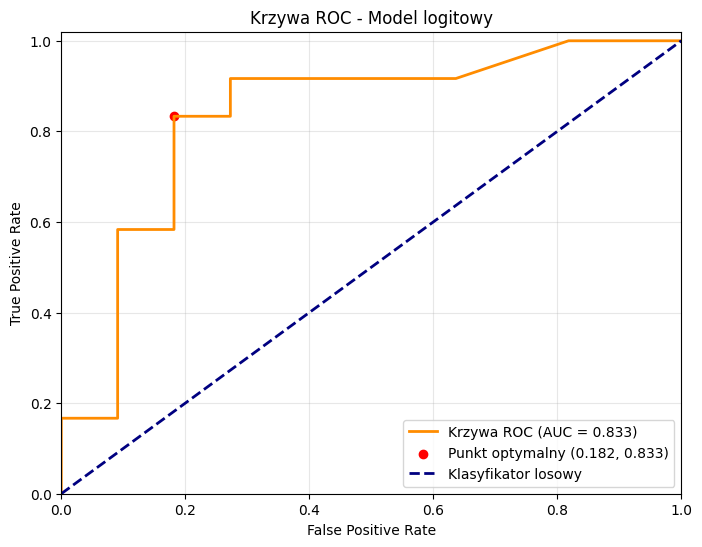

In [85]:
model_pot_verify = build_cereal_shelf_model("polka_3", ["potas"], 'K', roc=True)

In [87]:
model_pot_verify = build_cereal_shelf_model("polka_3", ["potas"], 'K', threshold=0.3)

Optimization terminated successfully.
         Current function value: 0.576381
         Iterations 6
 WERYFIKACJA KLASYFIKACJI DLA PRODUCENTA 'K' 
    potas  rzeczywista  predykcja  prawdopodobienstwo wynik
2     320            1          1                0.98    OK
3     330            1          1                0.99    OK
6      30            0          0                0.19    OK
16     35            0          0                0.21    OK
17     20            0          0                0.17    OK
19    160            1          1                0.75    OK
21     30            1          0                0.19  BŁĄD
24     30            0          0                0.19    OK
25     25            0          0                0.18    OK
26    100            0          1                0.48  BŁĄD
28    190            1          1                0.84    OK
38     60            1          1                0.30    OK
39     95            1          1                0.46    OK
46    160   

**Dodatkowe wnioski:** Po wyłączeniu z danych treningowych producenta o największej liczbie płatków w zbiorze danych, zbudowane modele całkiem dobrze sobie radzą z klasyfikacją płatków tych producentów na półce 3. Zmienne w obu modelach są istotne statystycznie. Dla pierwszego modelu i producenta K, zdolność modelu do klasyfikacji płatków na półce 3 charakteryzuje się wyższą zdolnością do klasyfikacji wykluczającej należenie do półki 3 niż że należą aczkolwiek F1 jest na poziomie 0.7, co jest całkiem dobrym wynikiem.

Dzięki zastosowaniu optymalnego progu klasyfikacji wyznaczonego metodą krzywej ROC, udało się zwiększyć czułość modelu o 25 punktów procentowych. Oznacza to, że model znacznie lepiej radzi sobie z wykrywaniem produktów, które faktycznie powinny znaleźć się na 3. półce (a na tym nam zależy), kosztem jedynie niewielkiego spadku specyficzności. Należy jednak zauważyć, że specyficzność i czułość są zbliżne oraz wartość F1 jest dość wysoka, co świadczy o poprawie skuteczności modelu.

Zbudowane modele wykazują wysoką zdolność do generalizacji, po wyłączeniu kluczowego producenta ze zbioru treningowego, algorytm wciąż poprawnie klasyfikuje większość danych dla danego producenta.

W modelach logitowych wartości Pseudo R^2 (McFadden) rzędu 0.2-0.4 są uznawane za bardzo dobre dopasowanie. Wynik w okolicy 0.16, przy tak małej próbie i tylko jednej zmiennej objaśniającej, należy uznać za satysfakcjonujący i potwierdzający istotność potasu jako predyktora klasyfikującego płatki na półkę 3.

# Półka 2

Optimization terminated successfully.
         Current function value: 0.538066
         Iterations 6
 WERYFIKACJA KLASYFIKACJI DLA PRODUCENTA 'K' 
    cukry  rzeczywista  predykcja  prawdopodobienstwo wynik
2       5            0          0                0.20    OK
3       0            0          0                0.11    OK
6      14            1          0                0.48  BŁĄD
16      2            0          0                0.14    OK
17     12            1          0                0.41  BŁĄD
19      7            0          0                0.25    OK
21      3            0          0                0.16    OK
24     13            1          0                0.44  BŁĄD
25     11            0          0                0.37    OK
26      7            1          0                0.25  BŁĄD
28     12            0          0                0.41    OK
38      6            0          0                0.23    OK
39      9            0          0                0.31    OK
46     13   

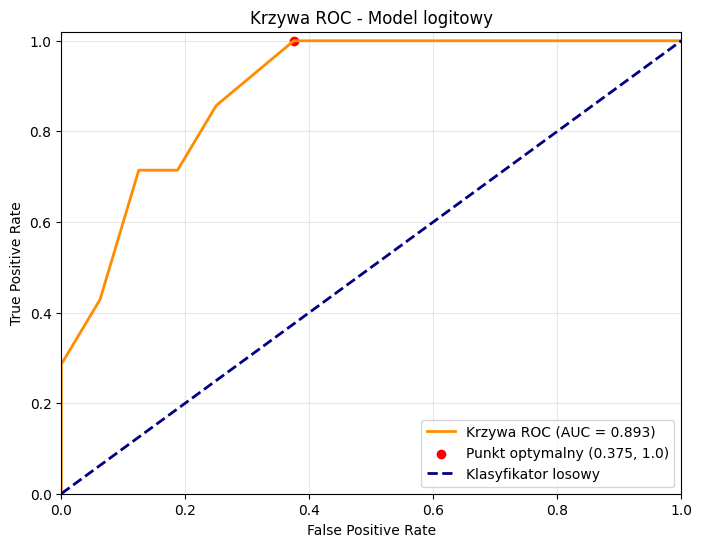

In [86]:
model_sug_verify = build_cereal_shelf_model("polka_2", ["cukry"], 'K', roc=True)

In [88]:
model_sug_verify = build_cereal_shelf_model("polka_2", ["cukry"], 'K', threshold=0.25)

Optimization terminated successfully.
         Current function value: 0.538066
         Iterations 6
 WERYFIKACJA KLASYFIKACJI DLA PRODUCENTA 'K' 
    cukry  rzeczywista  predykcja  prawdopodobienstwo wynik
2       5            0          0                0.20    OK
3       0            0          0                0.11    OK
6      14            1          1                0.48    OK
16      2            0          0                0.14    OK
17     12            1          1                0.41    OK
19      7            0          1                0.25  BŁĄD
21      3            0          0                0.16    OK
24     13            1          1                0.44    OK
25     11            0          1                0.37  BŁĄD
26      7            1          1                0.25    OK
28     12            0          1                0.41  BŁĄD
38      6            0          0                0.23    OK
39      9            0          1                0.31  BŁĄD
46     13   

**Dodatkowe wnioski:** Model logitowy dla polki 2 oparty na zmiennej cukier wykazuje znacznie słabsze właściwości klasyfikacyjne niż modele dla polki 3.
Niska wartość Pseudo R^2 (poniżej 0,12) oraz niska czułość sugerują, że zawartość cukru nie jest uniwersalnym predyktorem lokalizacji produktu dla tej półki i producenta. Analiza błędów dla producenta K pokazuje, że model systematycznie zaniża prawdopodobieństwo przynależności do 2. półki. Świadczy to o tym, że strategia lokowania słodkich produktów producenta K jest specyficzna i model de facto wyuczony na konkurencji nie potrafi jej w pełni zrekonstruować.

Po zmianie progu klasyfikacji dla półki 2 zauważono znaczącą poprawę jakości modelu. Niskie wartości czułości czy F1 sugerowały, że model logitowy poprawnie wyklucza produkty według zawartości cukru, ale standardowy próg 0.5 nie był optymalny.

Po zmianie progu na 0,25, model osiągnął pełną czułość (1,0) przy wysokim wskaźniku F1 (0,70). Podczas gdy model wyuczony na innych firmach oczekuje bardzo wysokich wartości cukru dla 2. półki, producent K umieszcza tam produkty już przy znacznie niższych stężeniach tej substancji. Optymalizacja progu pozwoliła na poprawę jakości klasyfikacji modelu jednakże nie jest to najlepszy model, m.in. poprzez małą liczność zbioru danych, co po wyłączeniu producenta sprawia, że model ten jest gorszy od poprzednich i zmienna cukier nie jest istotna statystycznie.